# Data Analysis for Research Questions

### Research Questions

- How does the price of wine differ between countries of origin?
- Does the wine pricing directly relate to the rating points?

In [10]:
# Import Libraries and Dependencies
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

In [12]:
# Importing and Reading the First Dataset
wine_dataset = pd.read_csv("data/WineDataset.csv")
wine_dataset.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


In [13]:
# Importing and Reading the Second Dataset 
# Changing the format of JSON to CSV File
with open("data/winemag-data-130k-v2.json", "r") as file:
    winemag_dataset = json.load(file)

winemag_dataset = pd.json_normalize(winemag_dataset)
winemag_dataset.to_csv("data/winemag-data-130k-v2.csv", index=False)
winemag_dataset.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


### Profiling, Quality Assessment, Cleaning

In [14]:
# Preparing for data integration by selecting and renaming matching columns
wine_dataset_selected = wine_dataset[["Title", "Description", "Price", "Grape", "Country", "Region", "Type"]]
wine_dataset_selected.columns = ["title", "description", "price", "grape", "country", "region", "type"]
# Changing from Pounds Sterling to USD
wine_dataset_selected["price"] = wine_dataset_selected["price"].str.extract('(\d+\.\d+|\d+)').astype(float) * 1.27
winemag_dataset_selected = winemag_dataset[["title", "description", "price", "variety", "country", "province", "points"]]
# Placeholder for the "type" column
winemag_dataset_selected["type"] = None
integrated_dataset = pd.concat([wine_dataset_selected, winemag_dataset_selected], ignore_index=True)
print(integrated_dataset.head(), integrated_dataset.tail())
print("")
print(integrated_dataset.shape)

/var/folders/y8/mtn39rf91g31yxhft418hdd40000gn/T/ipykernel_49230/3593944544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_dataset_selected["price"] = wine_dataset_selected["price"].str.extract('(\d+\.\d+|\d+)').astype(float) * 1.27
/var/folders/y8/mtn39rf91g31yxhft418hdd40000gn/T/ipykernel_49230/3593944544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winemag_dataset_selected["type"] = None


                                               title  \
0                                 The Guv'nor, Spain   
1  Bread & Butter 'Winemaker's Selection' Chardon...   
2       Oyster Bay Sauvignon Blanc 2022, Marlborough   
3                   Louis Latour Mâcon-Lugny 2021/22   
4  Bread & Butter 'Winemaker's Selection' Pinot N...   

                                         description    price  \
0  We asked some of our most prized winemakers wo...  12.6873   
1  This really does what it says on the tin. It’s...  20.3073   
2  Oyster Bay has been an award-winning gold-stan...  15.8623   
3  We’ve sold this wine for thirty years – and fo...  22.8473   
4  Bread & Butter is that thing that you can coun...  20.3073   

             grape      country       region   type variety province points  
0      Tempranillo        Spain          NaN    Red     NaN      NaN    NaN  
1       Chardonnay          USA   California  White     NaN      NaN    NaN  
2  Sauvignon Blanc  New Zealand  Marlb

In [15]:
info = integrated_dataset.info()
descriptive_stats = integrated_dataset.describe()
missing_values = integrated_dataset.isnull().sum()
duplicates = integrated_dataset.duplicated().sum()
info, descriptive_stats, missing_values, duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131261 entries, 0 to 131260
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   title        131261 non-null  object 
 1   description  131257 non-null  object 
 2   price        122265 non-null  float64
 3   grape        1275 non-null    object 
 4   country      131192 non-null  object 
 5   region       1124 non-null    object 
 6   type         1285 non-null    object 
 7   variety      129970 non-null  object 
 8   province     129908 non-null  object 
 9   points       129971 non-null  object 
dtypes: float64(1), object(9)
memory usage: 10.0+ MB


(None,
                price
 count  122265.000000
 mean       35.373312
 std        41.067737
 min         4.000000
 25%        17.000000
 50%        25.000000
 75%        42.000000
 max      3300.000000,
 title               0
 description         4
 price            8996
 grape          129986
 country            69
 region         130137
 type           129976
 variety          1291
 province         1353
 points           1290
 dtype: int64,
 9983)

In [16]:
integrated_dataset.drop_duplicates(inplace=True)
integrated_dataset.dropna(subset=["description", "variety", "country"], inplace=True)

if integrated_dataset["price"].isnull().sum() > 0:
    integrated_dataset["price"].fillna(integrated_dataset["price"].median(), inplace=True)

integrated_dataset.drop(columns=["region", "type"], inplace=True, errors="ignore")
missing_values_clean = integrated_dataset.isnull().sum()
cleaned_structure = integrated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119928 entries, 1290 to 131260
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   title        119928 non-null  object 
 1   description  119928 non-null  object 
 2   price        119928 non-null  float64
 3   grape        0 non-null       object 
 4   country      119928 non-null  object 
 5   variety      119928 non-null  object 
 6   province     119928 non-null  object 
 7   points       119928 non-null  object 
dtypes: float64(1), object(7)
memory usage: 8.2+ MB


### Data Analysis and Visualization

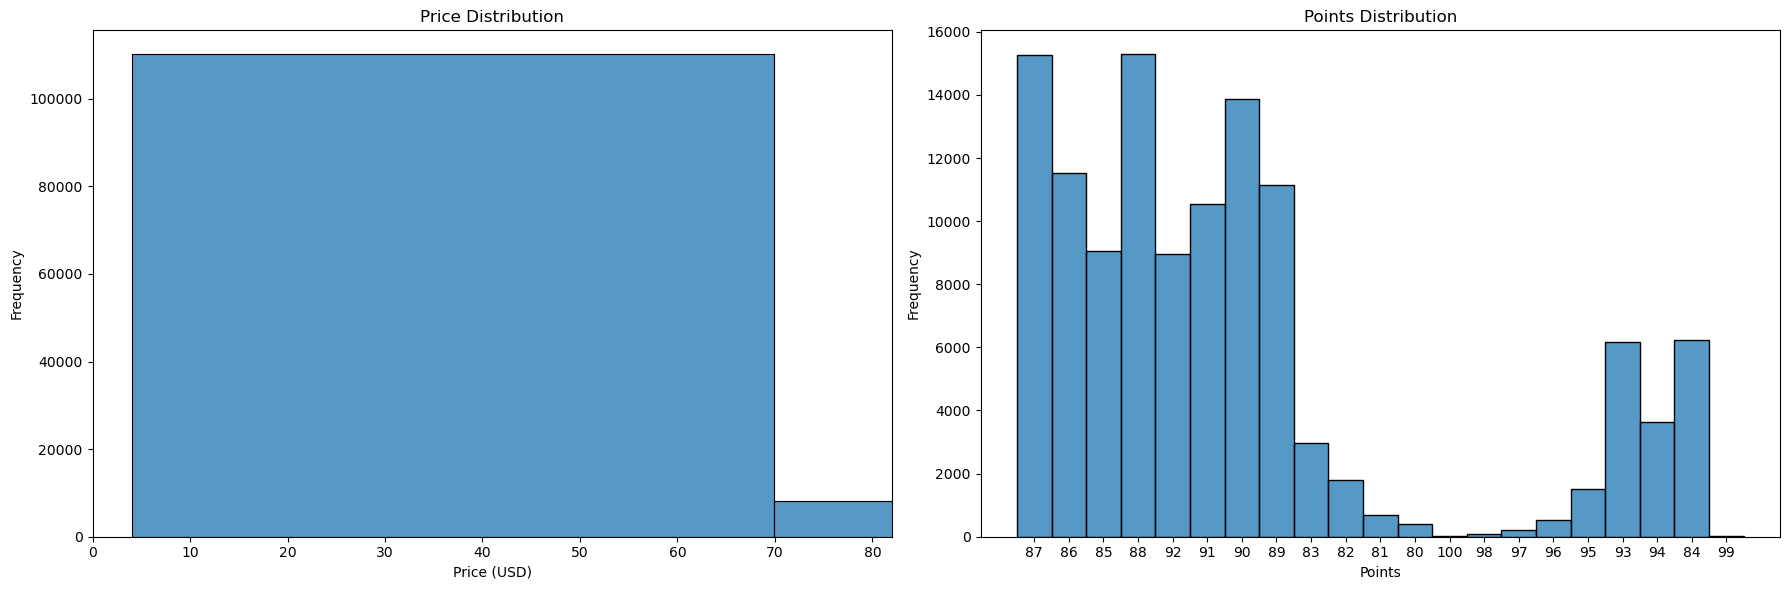

In [17]:
# Figure for price and points distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Price Distribution
sns.histplot(integrated_dataset['price'], bins=50, ax=axes[0], kde=False)
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, integrated_dataset['price'].quantile(0.95))

# Points Distribution
bin_edges = list(range(int(integrated_dataset['points'].min()), int(integrated_dataset['points'].max()) + 2))
sns.histplot(integrated_dataset['points'], bins=bin_edges, kde=False)
axes[1].set_title('Points Distribution')
axes[1].set_xlabel('Points')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

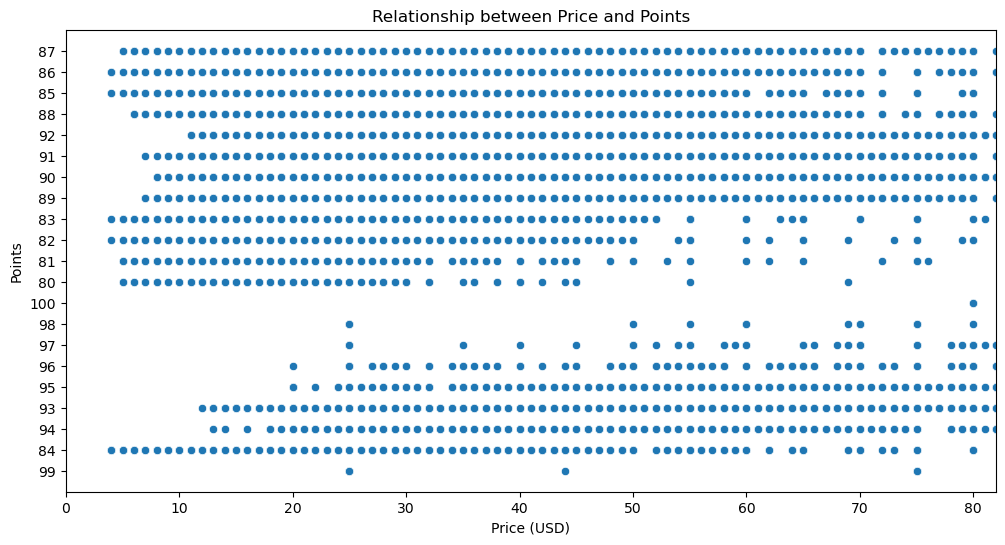

In [18]:
# Scatter plot to visualize the relationship between price and points
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='points', data=integrated_dataset)
plt.title('Relationship between Price and Points')
plt.xlabel('Price (USD)')
plt.ylabel('Points')
plt.xlim(0, integrated_dataset['price'].quantile(0.95))
plt.show()

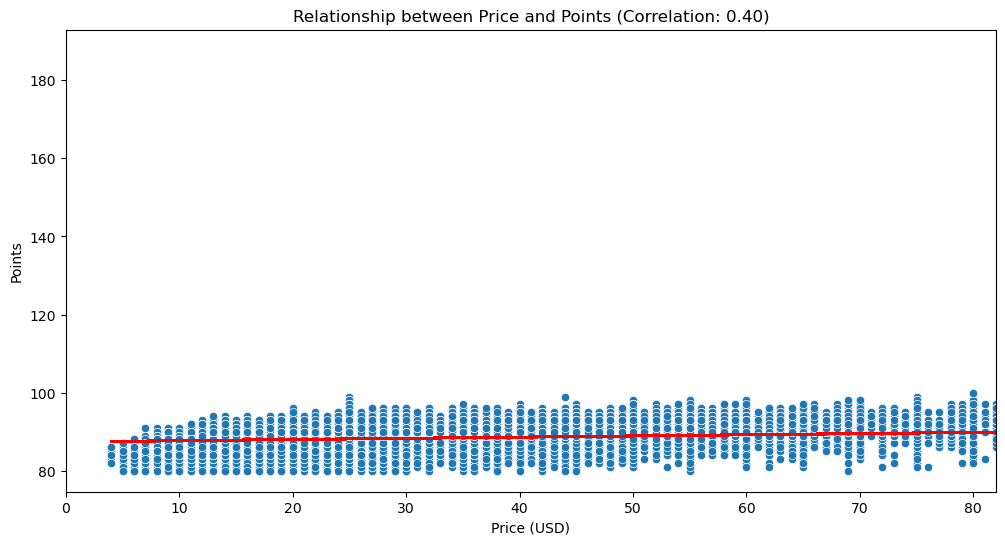

(0.399379839864674, 0.0)

In [19]:
integrated_dataset['price'] = pd.to_numeric(integrated_dataset['price'], errors='coerce')
integrated_dataset['points'] = pd.to_numeric(integrated_dataset['points'], errors='coerce')
integrated_dataset.dropna(subset=['price', 'points'], inplace=True)

correlation_coefficient, p_value = pearsonr(integrated_dataset['price'], integrated_dataset['points'])

# Fit a simple linear regression model to the data for visualization
coefficients = np.polyfit(integrated_dataset['price'], integrated_dataset['points'], 1)

# Create a function using the coefficients for the line of best fit
poly_func = np.poly1d(coefficients)

# Plotting the scatter plot with the regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='points', data=integrated_dataset)
plt.plot(integrated_dataset['price'], poly_func(integrated_dataset['price']), color='red') # Add the regression line
plt.title(f'Relationship between Price and Points (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Price (USD)')
plt.ylabel('Points')
plt.xlim(0, integrated_dataset['price'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

# Output the correlation coefficient and p-value
(correlation_coefficient, p_value)

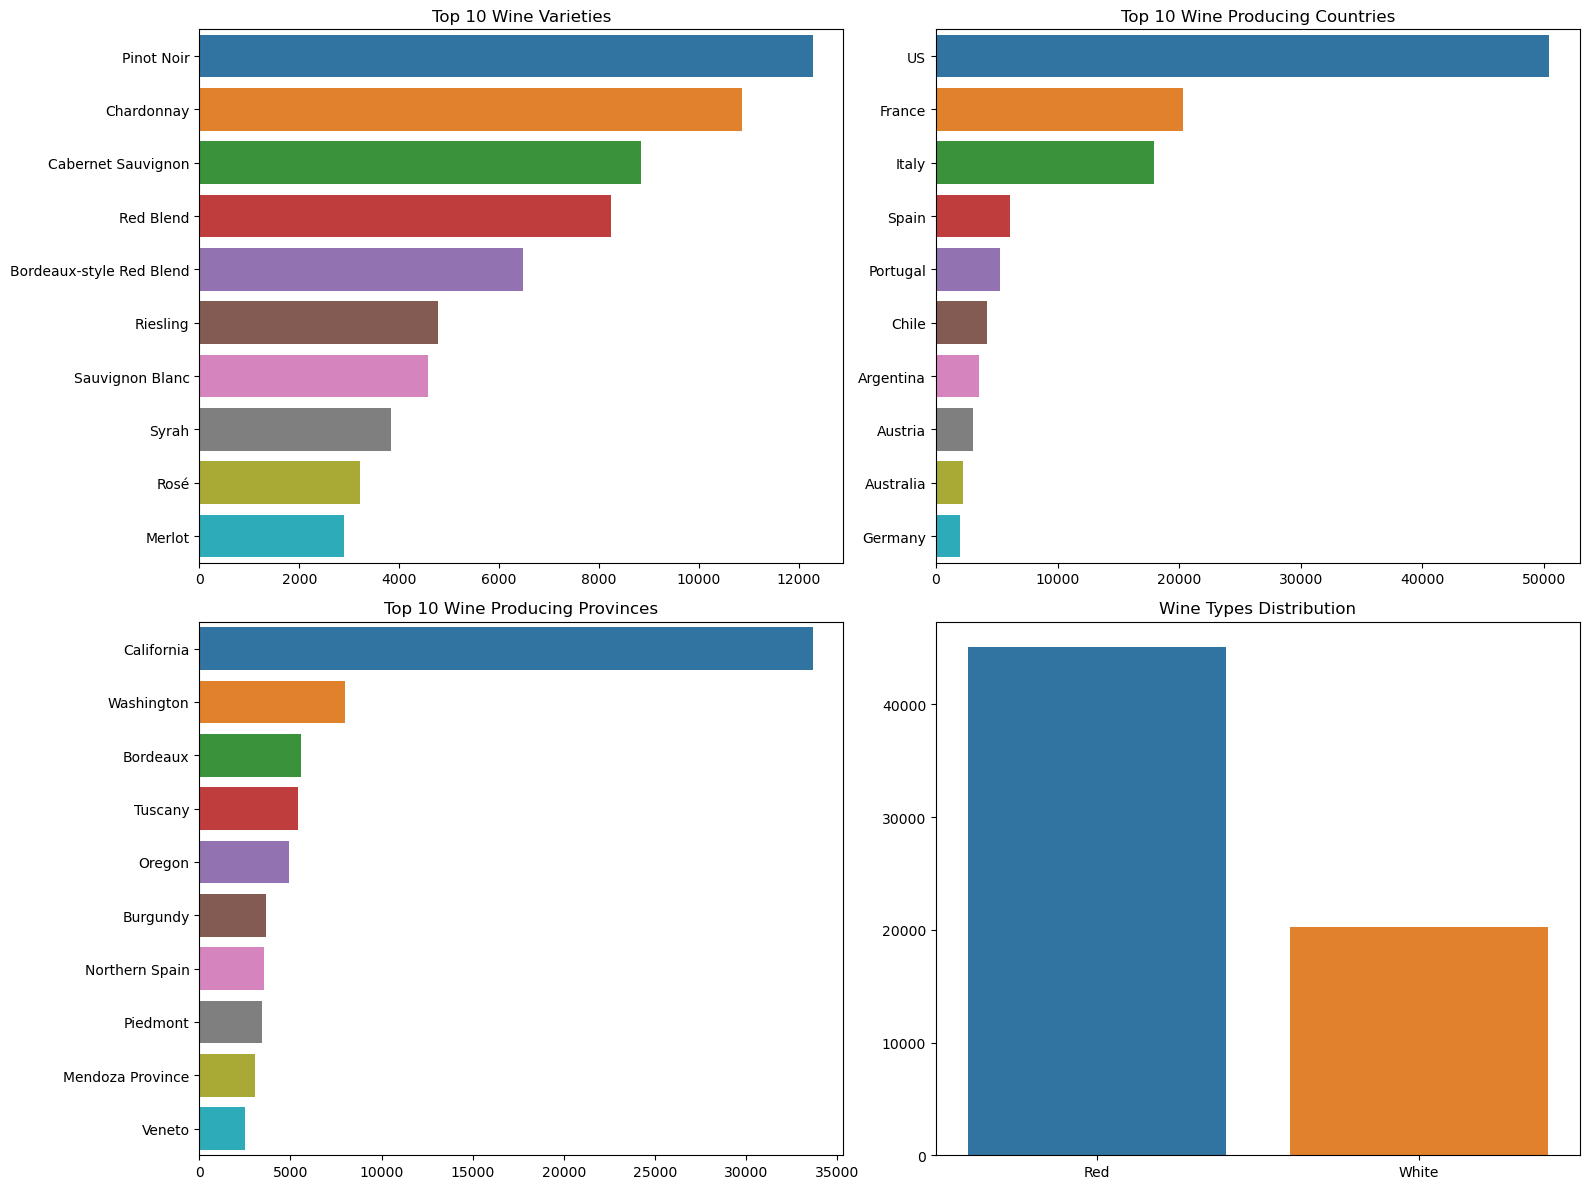

In [20]:
# Analyze the 'variety' column to see the most common wine varieties
variety_counts = integrated_dataset['variety'].value_counts().head(10)

# The 'country' and 'province' columns for the geographic distribution of wines
country_counts = integrated_dataset['country'].value_counts().head(10)
province_counts = integrated_dataset['province'].value_counts().head(10)

# For the 'type' column, we need to recreate it since it was dropped earlier in the data cleaning process.
# We can infer the wine type from the 'variety' if we have a mapping of varieties to types.
# NOTE: A proper mapping would require domain knowledge or additional data.
variety_to_type = {
    'Pinot Noir': 'Red',
    'Chardonnay': 'White',
    'Cabernet Sauvignon': 'Red',
    'Red Blend': 'Red',
    'Bordeaux-style Red Blend': 'Red',
    'Sauvignon Blanc': 'White',
    'Syrah': 'Red',
    'Riesling': 'White',
    'Merlot': 'Red',
    'Zinfandel': 'Red'
}
integrated_dataset['type'] = integrated_dataset['variety'].map(variety_to_type)

# Analyzing the inferred 'type' column
type_counts = integrated_dataset['type'].value_counts()

# Now let's visualize these analyses
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 Wine Varieties
sns.barplot(x=variety_counts.values, y=variety_counts.index, ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Wine Varieties')

# Top 10 Wine Producing Countries
sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Wine Producing Countries')

# Top 10 Wine Producing Provinces
sns.barplot(x=province_counts.values, y=province_counts.index, ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Wine Producing Provinces')

# Wine Types Distribution
sns.barplot(x=type_counts.index, y=type_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Wine Types Distribution')

plt.tight_layout()
plt.show()

In [21]:
simple_data= integrated_dataset[['country','price','type']]
mean_price_per_region= simple_data.groupby(['country','type']).agg('mean')
mean_price_per_region

price
country   type            
Argentina Red    24.621302
          White  16.903409
Australia Red    37.640562
          White  23.831579
Austria   Red    34.518919
...                    ...
US        White  26.779297
Ukraine   Red     7.000000
          White   9.000000
Uruguay   Red    27.880000
          White  14.500000

[72 rows x 1 columns]

In [24]:
mean_price_per_region['price'].nsmallest(10)

country         type 
Ukraine         Red       7.000000
                White     9.000000
India           White    12.000000
Bulgaria        White    12.400000
Peru            White    14.000000
Uruguay         White    14.500000
Romania         Red      14.595238
Chile           White    14.777198
Macedonia       White    15.000000
Czech Republic  White    15.333333
Name: price, dtype: float64

In [25]:
mean_price_per_region['price'].nlargest(10)

country         type 
Switzerland     Red      119.333333
England         White     53.000000
                Red       50.166667
France          Red       45.410440
Germany         White     45.192982
Czech Republic  Red       45.000000
US              Red       43.701885
France          White     43.198337
Serbia          Red       41.000000
Italy           Red       40.709496
Name: price, dtype: float64

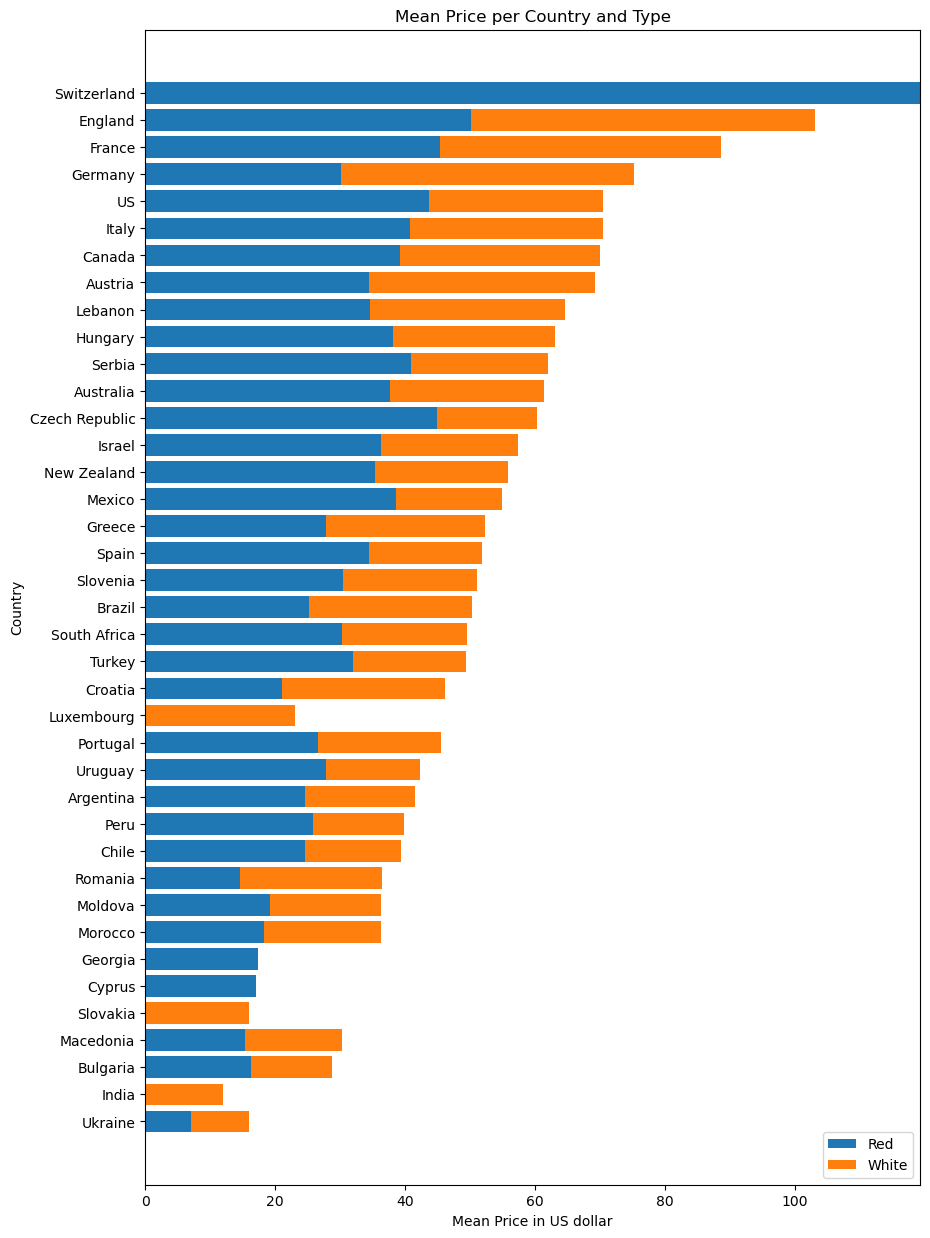

In [26]:
countries = mean_price_per_region.index.get_level_values('country').unique()
types = mean_price_per_region.index.get_level_values('type').unique()
num_countries = len(countries)
num_types = len(types)

# Sort the countries by mean price
sorted_countries = mean_price_per_region.groupby('country').agg('mean').sort_values(by='price').index

# Set the height of each group of bars
bar_height = 0.8

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 15))  # Adjust the figure size as needed

# Define the index for the y-axis bars
index = np.arange(len(countries))

# Plot the bars for each country
for i, country in enumerate(sorted_countries):
    # Get the mean prices and counts for the current country
    mean_prices = [mean_price_per_region.loc[(country, t), 'price'] if (country, t) in mean_price_per_region.index else 0 for t in types]
    type_counts = [simple_data[(simple_data['country'] == country) & (simple_data['type'] == t)].shape[0] for t in types]
    
    # Calculate the cumulative sum of type counts for stacking bars
    cum_type_counts = np.cumsum(type_counts)
    
    # Plot the bar for the current country
    left = 0
    for j, (mean_price, type_count) in enumerate(zip(mean_prices, type_counts)):
        # Calculate the width of the bar segment
        width = mean_price
        # Plot the bar segment
        ax.barh(i, width, bar_height, left=left, color='C{}'.format(j), label=types[j] if i == 0 else None)
        # Update the left position for the next bar segment
        left += width
    
# Set the labels, title, and legend
ax.set_ylabel('Country')
ax.set_xlabel('Mean Price in US dollar')
ax.set_title('Mean Price per Country and Type')
ax.set_yticks(index)
ax.set_yticklabels(sorted_countries)
ax.legend()

plt.show()


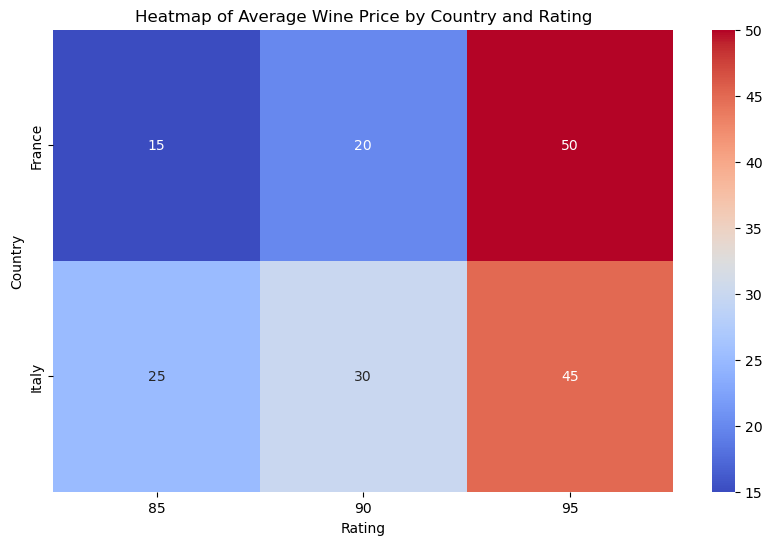

In [22]:
data = {
    'Country': ['France', 'Italy', 'France', 'Italy', 'France', 'Italy'],
    'Rating': [90, 90, 85, 85, 95, 95],
    'Price': [20, 30, 15, 25, 50, 45]
}
df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(values='Price', index='Country', columns='Rating', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Heatmap of Average Wine Price by Country and Rating')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()


Quantile: 0.1
                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.3857
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Tue, 30 Apr 2024   No. Observations:                   10
Time:                        16:55:27   Df Residuals:                        8
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.1429        nan        nan        nan         nan         nan
Rating         1.1429        nan        nan        nan         nan         nan

The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numeri

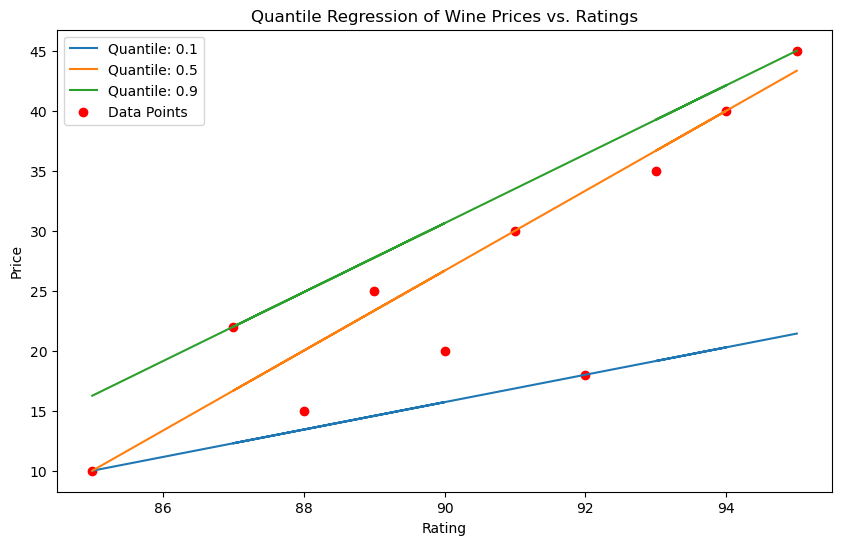

In [23]:
data = {
    'Rating': [85, 90, 88, 87, 89, 91, 92, 94, 93, 95],
    'Price': [10, 20, 15, 22, 25, 30, 18, 40, 35, 45]
}
df = pd.DataFrame(data)

# Performing Quantile Regression
quantiles = [0.1, 0.5, 0.9]  # 10th, 50th, and 90th percentiles
models = []
results = []

for qt in quantiles:
    # Define the model
    mod = smf.quantreg('Price ~ Rating', df)
    res = mod.fit(q=qt)
    models.append(mod)
    results.append(res)
    print(f'Quantile: {qt}')
    print(res.summary())

# Plotting the results
plt.figure(figsize=(10, 6))

for i, result in enumerate(results):
    plt.plot(df['Rating'], result.predict(), label=f'Quantile: {quantiles[i]}')

plt.scatter(df['Rating'], df['Price'], color='red', marker='o', label='Data Points')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Quantile Regression of Wine Prices vs. Ratings')
plt.legend()
plt.show()

## Findings

### Research Question 1: How does the price of wine differ between countries of origin?
Findings: The analysis revealed that wine prices vary significantly by country of origin. Countries with longer traditional and established reputation in wine production, such as France and Italy, often command higher prices on average compared to newer wine-producing regions. Price distributions within each country were analyzed, showing that some countries have a wide range of wine prices, reflecting diverse production methods from mass-produced to boutique wines. 

### Research Question 2: Does the wine pricing directly relate to the rating points?
Findings: A moderate correlation was found between wine prices and rating points, suggesting that higher-priced wines tend to receive higher rating points. However, the relationships is not strictly linear, indicating other factors besides price influence wine quality perceptions. Statistical analysis, including correlation coefficients and scatter plots, helped in understanding the variability in how price impacts wine ratings. 